## Case Study Background
On your seventh week as an intern, your manager wants 
you to show how different data features are 
correlated with the target variable. 
He's specifically interested in revealing the relationship 
between *movie rating* and *the time people spent on movie 
browsing* before making a decision regarding the movie bookings.

### About the dataset

Each row in this dataset captures a customer booking:
- `unit_price`: is the price per ticket
- `quantity`: is the number of tickets in that booking
- `time_on_site`: is the amount of seconds it takes between the customer first logged onto the site and when they finished placing the booking
- `movie_rating`: is the average customer rating of that movie (at the time of the booking)
- `label`: is the company's internal classification of that booking. 
    - `Low` if they booked <= 5 tickets; 
    - `Medium` if they booked between 6 and 10 tickets; 
    - and `High` if the purchase was more than 10 tickets.

## Learning objectives
- Calculate Pearson-$r$ correlation by hand.
- Apply Pearson-$r$ correlation using the `pandas` library and plotting it using `matplotlib.pyplot`.
- Learn to discretize data manually using domain knowledge. 
- Then apply discretization on data using some `sklearn` library functions. 
- Know how to calculate Mutual Information by hand. 
- Finally, apply Mutual Information using `scipy` library functions.

## Workshop Overview
- Manually calculate Pearson-$r$ and Mutual Information **with a separate dataset (steps vs heart rate)** 
- Write a function to calculate the Pearson-$r$ between `movie rating` and `time on site`. 
- Use the `pandas` library to calculate the Pearson-$r$ between `movie rating` and `time on site`. 
- Write a function to discretize the `quantity` variables using domain knowledge.
- Discretize the `time_on_site` variables into three bins using `sklearn` library function.
- Write a function to calculate the Mutual Information between `quantity` and `time on site` variables. 
- Use the `scipy` library function to calculate the Mutual Information between `quantity` and `time on site`. 

## <u> Concept: Pearson Correlation Coefficient </u>
The Pearson Correlation Coefficient measures the **linear relationship between two data variables**. 
- The value of Pearson Correlation Coefficient varies between `-1` and `+1`, with 0 implying no correlation. 
    - Correlations of `-1` or `+1` imply an exact linear relationship. 
    - Positive correlations imply that as x increases, so does y. 
    - Negative correlations imply that as x increases, y decreases.
- It's good to know that this correlation coefficient is *not robust* as it can be affected by outliers.

Requirements/Assumptions for using the Pearson's correlation coefficient:
- Scale of measurement should be an interval or ratio.
- Variables should be approximately normally distributed if a significance test is to be trusted.
- The association should be linear (can be confirmed using a visualisation).

## Formula and Derivation
Given paired data ${\displaystyle \left\{(x_{1},y_{1}),\ldots ,(x_{n},y_{n})\right\}}$  pairs, perason correlation coefficient ${\displaystyle r_{xy}}$ between them is defined as:

$${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}  (Eq. 1) $$ 
where: 

- ${\displaystyle n}$ is sample size 
- ${\displaystyle x_{i},y_{i}}$ are the individual sample points indexed with $i$
- ${\textstyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}}$ is the  sample mean 

Whilst it's good to have the formula in front of you, it is quite important and useful to know how this is calculated (refer to the above requirements/assumptions).

As a class, go through the derivation of the Pearson Correlation Coefficient and discuss the following:
1. Mean
2. Variance
3. Standard Deviation
4. Covariance
5. Pearson Correlation Coefficient

<blockquote style="padding: 10px; background-color: #FFD392;">


## Individual Exercise 1 (By Hand, Steps vs Heart Rate)
_Your tutor may start off the first step(s) to give you an idea of what to do._
    
Consider the following hypothetical dataset providing measurements for `Average Steps per day` and `Average Resting Heart Rate`, across a sample of $n=12$ people.
    
Person ID | Average steps per day | Average resting hear rate 
--- | --- | --- 
1  | 1000 | 100 
2  | 2500 | 105 
3  | 3000 | 80
4  | 5000 | 77 
5  | 6000 | 74 
6  | 9000 | 70 
7  | 11000 | 65 
8  | 14000 | 63 
9  | 18000 | 62 
10 | 19000 | 61 
11 | 19500 | 60.5   
12 | 22000 | 55     
    
    
Compute the Pearson correlation between `Average Steps per day` and `Average Resting Heart Rate`. Show your working. How would you interpret this correlation value?

<blockquote style="padding: 10px; background-color: #ebf5fb;">

    
## Class Exercise 1
1. Based on the Pearson correlation value, can one conclude that doing more steps per day will cause one's average resting heart rate to decrease? 
2. How else might it be interpreted?
3. Then, as a class, discuss appropriate ways of reaching _conclusions_ with the Pearson Correlation Coefficient. 
    
Remember, the correlation coefficient is **one of many metrics** and should never be the sole metric used to reach a statistical conclusion!

Now, lets practice using Python 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('week06_correlation.csv')
data.head()

,unit_price,movie_rating,time_on_site,quantity,label
0,25,6.98,129.402179,3,Low
1,25,8.09,96.931070,3,Low
2,25,7.56,102.937014,1,Low
3,25,6.83,127.514061,4,Low
4,20,6.34,152.369508,5,Low


First we will draw a scatter plot to observe the  linear relationship between `movie rating` and `time on site`. We do so as we must assume a linear relationship exists in order to compute correlation.

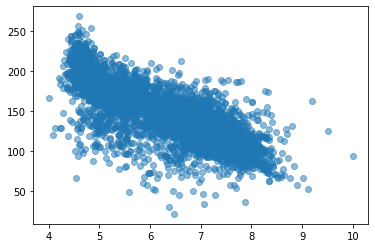

In [3]:
plt.scatter(x=data['movie_rating'], y=data['time_on_site'], alpha=0.5)

plt.show()

Here, we can observe that there is a negative linear relationship between `movie_rating` and `time_on_site` using a scatter plot.

## Writing a Function from First Principles
Now, we will write a function to calculate the correlation between  `movie rating` and `time on site` using the equation provided above.

In [4]:
def pearson_r(feature_a, feature_b):
    """
    A function which computes the Pearson Correlation between two features
    """
    # compute the mean
    mean_a = feature_a.mean()
    mean_b = feature_b.mean()
    
    # compute the numerator of pearson r
    numerator = sum((feature_a - mean_a) * (feature_b - mean_b))
    
    # compute the denominator of pearson r
    denominator = np.sqrt(sum((feature_a - mean_a) ** 2) * sum((feature_b - mean_b) ** 2))
    
    return numerator/denominator

In [5]:
r = pearson_r(data['movie_rating'], data['time_on_site'])

# Print the correlation to four decimal places. Refer back to COMP10001 f-strings if you are unsure.
print(f"{r:.4f}")

-0.7608


We can also simply compute the correlation using a `pandas.DataFrame()` method!

In [6]:
FEATURES = ['movie_rating', 'time_on_site']

data[FEATURES].corr(method='pearson')

,movie_rating,time_on_site
movie_rating,1.00000,-0.76076
time_on_site,-0.76076,1.00000


**Question: As a class, discuss the output of the correlation matrix above. Additionally, what does it mean to say _"correlation does not imply causality?"_**

## IMPORTANT: Inappropriate Use Cases of Pearson Correlation ###
- Correlation is best suited to *continuous*, *normally distributed* data and is thus easily swayed by extreme values. As such, correlation will misrepresent relationships that are non-linear and/or non-continuous. 

In the following example, the relationship between `time_on_site` and `quantity` is non-linear. However, the calculated correlation value misrepresents the relationship between them.

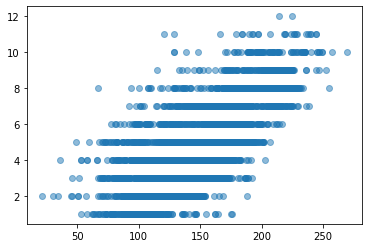

In [7]:
# Visual check to see that the 2 variables are not linearly correlated
plt.scatter(data['time_on_site'], data['quantity'], alpha=0.5)

plt.show()

In [8]:
# Calculate Pearson's r to see that it's suggesting a positive linear correlation
INCORRECT_FEATURES = ['time_on_site', 'quantity']

data[INCORRECT_FEATURES].corr(method='pearson')

,time_on_site,quantity
time_on_site,1.000000,0.763127
quantity,0.763127,1.000000


In these cases where Pearson's r is not an appropriate measure of correlation, we can use the Mutual Information (MI) score as a correlation metric instead. However, we need the variables to be converted into discrete variables, via Discretization.

## <u>Concept: Discretization</u>
Discretization is the process through which we can transform continuous variables into a discrete form. 

- We do this by creating a set of intervals (better known as **bins**) that go across the range or frequency of our desired variable. 

We will now learn two methods of discrerization on continuous variable.

<blockquote style="padding: 10px; background-color: #FFD392;">


## Individual Exercise 2 (By Hand, Steps vs Heart Rate)
Apply `3 bin equal frequency` discretisation to `Average Steps per day` and `4 bin equal frequency` discretisation to `Average Resting Heart Rate`. Show the values of the discretised features.

## Discretization via Domain Knowledge
- Domain Knowledge is known as the "business context" or "background context" behind the dataset.
- Whilst numbers can tell you a lot of information, it is always good to refer back to the actual meaning behind the dataset.

First we will discretize the continuous variable `quantity` into 3 bins based on our "domain knowledge". 

In [9]:

def bin_quantity(x):
    """
    Domain knowledge oriented discretization with the following bins:
    
        [min, 5), [5, 10), [10, max] 
        
    Remeber that [] denote inclusive, () denote exclusive.
    """
    LOWER = 5
    UPPER = 10
    
    # [min, 5)
    if x < LOWER:
        return 0
    # [5, 10)
    elif LOWER <= x < UPPER:
        return 1 
    # [10, max] 
    return 2

# apply the function on the series
data['binned_quantity'] = data['quantity'].apply(bin_quantity)

# also, print out the min/max for this feature
min(data['quantity']), max(data['quantity'])

(1, 12)

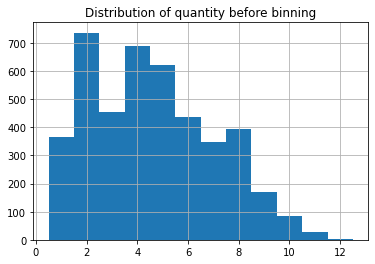

In [10]:
data['quantity'].hist(bins=np.arange(13)+0.5)

plt.title('Distribution of quantity before binning')

plt.show()

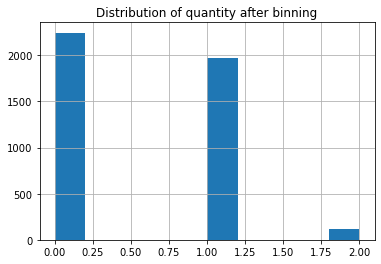

In [11]:
data['binned_quantity'].hist()

plt.title('Distribution of quantity after binning')

plt.show()

You'll notice above that the bins are now looking a bit sparse. That's expected since we discretized our values into 0, 1, and 2.

In order to make it look a "bit nicer", we can specify `bins=3` to denote the width.

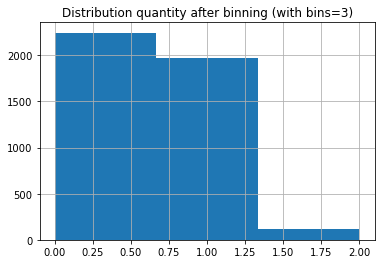

In [12]:
data.hist('binned_quantity', bins=3)

plt.title('Distribution quantity after binning (with bins=3)')

plt.show()

## Discretization via Binning

Now we will discretize the continuous variable `time_on_site` into 3 bins based on the `sklearn` [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html) function. 

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

equal_width = KBinsDiscretizer(n_bins=3, # number of bins
                               # the method and strategy which are out-of-scope for this subject. 
                               # If you are interested, take Machine Learning
                               encode='ordinal', 
                               strategy='uniform')

# a transformed version of 
data['binned_time_on_site'] = equal_width.fit_transform(data[['time_on_site']]).astype(int)

In [14]:
# look at a sample of the data
data[['time_on_site', 'binned_time_on_site']].head(10)

,time_on_site,binned_time_on_site
0,129.402179,1
1,96.931070,0
2,102.937014,0
3,127.514061,1
4,152.369508,1
5,129.696410,1
6,154.175174,1
7,189.422895,2
8,167.208314,1
9,180.088347,1


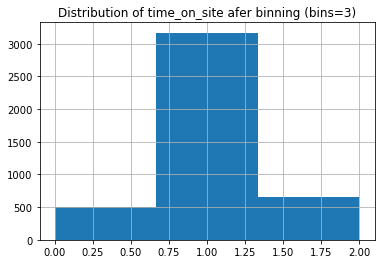

In [15]:
data['binned_time_on_site'].hist(bins=3)

plt.title('Distribution of time_on_site afer binning (bins=3)')

plt.show()

To plot multiple features using `pandas` plotting, you can pass through an array of `column`. Here's an example.

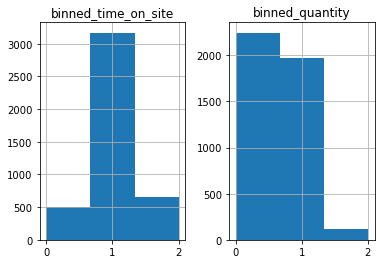

In [16]:
data.hist(column=['binned_time_on_site', 'binned_quantity'], bins=3)

plt.show()

## <u> Concept: Entropy </u>
Entropy is the amount of _information_ or _uncertainty_ in some variables' possible outcome. For example:
- An unbiased coin flip (50% Heads, 50% Tails) will have an entropy of 1. 
- A biased coin flip (100% Heads, 0% Tails) will have an entropy of 0. 
    
From above, hopefully you can see that the entropy is 1 with the unbiased coin flip because there is one _uncertainty_ in the flip (either heads or tails). Likewise, in the biased coin flip, we have no _uncertainty_ (100% certain we are getting Heads), hence, the entropy is 0.
    
It originates from Shannon's Entropy (which is to do with bits in networking), hence, the reason why you should be using the logarithm base 2 when doing calculations.
    
The entropy is given to you as:
    
$$
H(X) = -\sum P(X=x_i)\log_2(P(X=x_i)) 
$$
    
1. $P(X=x_i)$ represents the event $x_i$ occurring.
2. For binning, $P(X=x_i)$ specifically represents the probability of a data value belonging to a specific bin.
    
## <u> Concept: Conditional Entropy </u>
The conditional entropy is the amount of _information_ to describe an outcome of $Y$ given that $X$ occurred.
    - It's good to know that if $Y$ is completely determined by $X$, then $H(Y|X)=0$.
    
    
The conditional entropy is given to you as:
    
$$
H(Y|X) = \sum_{x_i \in X} P(X=x_i) H(Y|X=x_i),
$$

where $H(Y|X=x)$ means calculating the entropy of the distribution $P(Y|X=x)$:

$$H(Y|X=x) = -\sum_{y_j \in Y} P(Y=y_j|X=x)\log_2(P(Y=y_j|X=x)).$$
    
The conditional entropy of $Y$ given $X$ is the probability of $x_i$ occurring _times_ the entropy of $Y$ given that $x_i$ occurred. 
- You can think of it as "locking" or "fixing" the condition on event $x_i$, then compute $Y$ with the remaining values.

## <u> Concept: Mutual Information (MI) </u>
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. It is considered more general than correlation and handles non-linear dependencies and discrete random variables.

In other words:
* It is the amount of _dependence_ between two random variables.
* The larger the MI, the more dependent or correlated they are.
* In contrast, the greater the _entropy_, the more _uncertain_ we are. 


The mutual information between two random variables $X$ and $Y$ can be stated formally as follows:

$$
\text{MI}(X, Y) = H(X) – H(X | Y) = H(Y) - H(Y | X)
$$
where
- $\text{MI}(X, Y)$ is the mutual information for $X$ and $Y$
- $H(X)$ is the entropy for $X$ 
- $H(X|Y)$ is the conditional entropy for $X$ given $Y$. 

#### Advanced
_Normalized Mutual Information (NMI)_ is a normalization of MI to scale the results between 0 (no mutual information) and 1 (perfect correlation). It is computed using the following formula:

$$
\text{NMI}(X, Y) = \frac{\text{MI}(X,Y)}{min(H(X),H(Y))}
$$
where
- $\text{MI}(X,Y)$ is the mutual information for $X$ and $Y$
- $H(X)$ is the entropy for $X$ 
- $H(Y)$ is the entropy for $Y$ 




<blockquote style="padding: 10px; background-color: #FFD392;">


## Individual Exercise 3 (By Hand, Steps vs Heart Rate)
Using the discretized features, compute the following entropies: 
1. `H(Average Steps per day)` 
1. `H(Average Resting Heart Rate)`
1. `H(Average steps per day | Average Resting Heart Rate)`
1. `H(Average Resting Heart Rate | Average Steps per day)`
    
## Individual Exercise 4 (By Hand, Steps vs Heart Rate)
Using the above information, compute the mutual information between `Average Steps per day` and `Average Resting Heart Rate`.

Now, lets practice to compute MI using python. First we will write a function to compute the NMI between `quantity` and  `time_on_site`. 

In [17]:
def compute_probability(col):
    """
    Compute the probability of a certain event
    """
    return col.value_counts() / col.shape[0]

def compute_entropy(col):
    """
    Compute the entropy of a certain event
    """
    probabilities = compute_probability(col)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

In [18]:
# for the binned quantity
print("Probabilities")
print(compute_probability(data['binned_quantity']))
print("\nEntropy for binned_quantity")
print(compute_entropy(data['binned_quantity']))

Probabilities
0    0.519075
1    0.455029
2    0.025896
Name: binned_quantity, dtype: float64

Entropy for binned_quantity
1.1444372056671537


In [19]:
# for binned time on site
print(compute_entropy(data['binned_time_on_site']))

1.1015470420424556


In [20]:
def compute_conditional_entropy(x, y):
    """
    Compute the conditional entropy between two random variables.
    Specifically, the conditional entropy of Y given X.
    """
    probability_x = compute_probability(x)
    
    temp_df = pd.DataFrame({'X': x, 'Y': y})
    
    entropy_by_group = temp_df.groupby('X')['Y'].aggregate(compute_entropy)
    conditional_entropy = sum(probability_x * entropy_by_group)
    
    return conditional_entropy

print(compute_conditional_entropy(data['binned_time_on_site'], data['binned_quantity']))
print(compute_conditional_entropy(data['binned_quantity'], data['binned_time_on_site']))

0.929206354118664
0.8863161904939663


In [21]:
def NMI(x, y):
    """
    Compute the NMI between two random variables
    """
    # H(X) and H(Y)
    entropy_x = compute_entropy(x)
    entropy_y = compute_entropy(y)
    
    # H(Y|X)
    conditional_entropy = compute_conditional_entropy(x, y)
    
    # MI(X, Y)
    MI = entropy_y - conditional_entropy 
    # same as MI = entropy_x - compute_conditional_entropy(y, x)
    
    return MI / min(entropy_x, entropy_y)

print(NMI(data['binned_time_on_site'], data['binned_quantity']))

0.19538961418244566


We can also simply compute the NMI using `sklearn` [normalized_mutual_info_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html).

Now, we will use this function to find the NMI between `time_on_site` and `quantity`.

In [22]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(data['binned_time_on_site'], 
                             data['binned_quantity'], 
                             
                             # we use min here because in NMI, we want to have our demoninator
                             # to be min(H(X), H(Y))
                             average_method='min')

0.1953896141824446

Will we ask you to implement these functions in the exam? Well, the easy answer is NO. However, you will **need to know how to apply these formulas by hand and compute these values without Python in the exam**.

# <u> Challenge questions </u>
For the binned features provided, compute the:
- Entropy
- Conditional Entropy
- Mutual Information
- Normalized Mutual Information

for all features vs `label`.

In [23]:
FEATURES = [col for col in data.columns if col.startswith('binned')]

In [24]:
data[FEATURES]

,binned_quantity,binned_time_on_site
0,0,1
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
4320,1,1
4321,1,0
4322,0,1
4323,1,1


In [25]:
data['label']

0          Low
1          Low
2          Low
3          Low
4          Low
         ...  
4320    Medium
4321    Medium
4322       Low
4323       Low
4324       Low
Name: label, Length: 4325, dtype: object